In [5]:
from IPython.display import YouTubeVideo

# Quellen

Die folgenden Erläuterungen beschreiben Notizen zu dem Video:

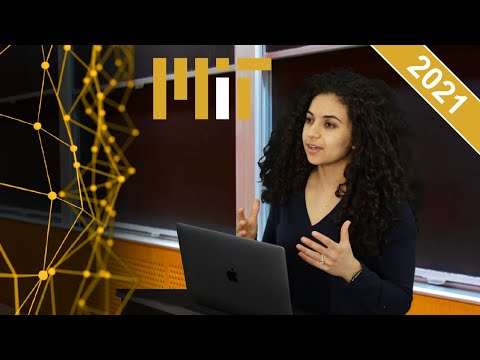

In [4]:
YouTubeVideo('BUNl0To1IVw', width=300, height=200)

Die Darstellungen innerhalb dieses Notebooks sind ebenfalls aus diesem entnommen.  
In diesem Rahmen möchte ich mich für die Arbeit der folgenden Referenz bedanken  
und diese als Quelle aller Inhalte dieses Notebooks benennen:

© Alexander Amini and Ava Soleimany  
MIT 6.S191: Introduction to Deep Learning  
IntroToDeepLearning.com  

# 1. Generative modeling

* Beschreibt einen Bereich des Unsupervised Learnings
* Ziel: Nimmt als Trainingsdaten Samples von einer Verteilung und lernt ein Modell, dass die Verteilung repräsentiert
* Use-Cases:
> * Density Estimation
> * Sample Generation   

### 1.1. Vorteile generativer Modelle
> * Erkennen der dem Datensatz zugrundeliegenden Struktur (Verteilung) 
> * Erzeugen eines unbaised Datensatzes
> * Outlier Detection (Durch Werte die Stark von der gelernten Verteilung abweichung)

### 1.2. Latent variable models

Latent variable models, sind eine Subgruppe des generative modelings.  
Sie können verwendet werden, um die latenten Faktoren zu erlernen, die einer Verteilung zugrunde liegen.

Beispiele für Arten von latent variable models sind:
* Generative adversarial networks
* Variational Autoencoders


# 2. Autoencoders

Autoencoders beschreiber einen Ansatz, um eine niederdimensionale Feature Repräsentation von unlabelled Daten zu erlernen.
Dabei erzeugen sie eine Transformation, die, ähnlich wie die PCA den Datenraum reduziert und dennoch versucht die Kerninformationen in diesem zu erhalten. 

Vorteile die aus dem Erlernen einer solchen Repräsentation entstehen sind die folgenden:
> * Kompression der Daten
> * Verringern der Dimensionalität $\rightarrow$ Lernprozess effektivieren

Diese Modelle bestehen aus zwei Komponenten, welche während der Trainingsphase gelernt werden. Diese sind:
1. Encoder
2. Decoder

### 2.1. Encoder

Der Encoder lernt ein Mapping der Input-Daten $x$ auf einen niederdimensionalen latenten Raum $z$. Erreicht wird dies durch mehrere Layer, welche jeweils, eine geringere Dimensionalität aufweisen, wie das davor liegend Layer. Daraus entsteht ein Modell, was dem Aufbau der folgenden Darstellung ähnelt:


<img src="./bilder/encoder.PNG" alt="encoder" width="400" style="background-color:white;"/>

### 2.2. Decoder

Der Decoder beschreibt ein Modell, das lernt die ursprünglichen Input-Werte, aus dem Output $z$ des Encoders zu rekonstruieren $\hat{x}$. Dabei ist der Aufbau des Modells gegenteilig zu dem des Encoders und hat im Output-Layer die gleiche Dimensionalität, wie $x$, wie der folgenden Abbildung entnommen werden kann:

<img src="./bilder/decoder.PNG" alt="decoder" width="400" style="background-color:white;"/>

### 2.3. Wofür der Decoder?

Während des Trainingsprozess wird der Erfolg des Encoders durch die Fähigkeit des Models beschrieben, die Daten so zu transformieren, dass der Output des Encoders $z$ eine interpretierbare Repräsentation von $x$ darstellt. Mittels des Decoders kann nun überprüft werden, ob dies zutrifft. 
Dies geschieht durch den MSE zwischen $x$ und $\hat{x}$:

<img src="./bilder/autoencoder.PNG" alt="autoencoder" width="600" style="background-color:white;"/>



# 3. Variational Autoencoders

Unterscheidet sich zu "normalen" Autoencodern dadurch, dass hier kein Mapping auf einen niederdimensionale Vektor $z$ entsteht, sondern ein Mapping auf eine Verteilung. Somit wird eine Wahrscheinlichkeitsfunktion der latenten Variablen gelernt.

Der Layer $z$ wird somit ersetzt durch ein Mapping auf eine Verteilung. Durch diese Mapping entsteht eine neue Netzwerkarchitektur, die wie folgt aussieht:

<img src="./bilder/VAEs.PNG" alt="VAEs" width="600" style="background-color:white;"/>

### 3.1. VAE Lernprozess
Durch diese Architektur können neue Daten erzeugt werden, in dem latente Samples durch die gelernte Verteilungsparameter erstellt werden. Hier entsteht also ein probabilistischer Ansatz, in dem der VAE zwei Funktionen lernt.

1. Encoder lernt:
> $q_\phi(z|x)$: Wahrscheinlichkeitsverteilung von $z$ gegeben dem Input $x$

2. Decoder lernt:
> $p_\theta(x|z)$: Wahrscheinlichkeitsfunktion für $x$ gegeben der Wahrscheinlichkeitsverteilung $z$ 

Die Verlustfunktion mit der dieser Prozess durchgeführt wird betrachtet dabei zwei Komponenten:

$\mathcal{L}(\phi, \theta, x)= ($reconstruction loss $)+($regularization term$)$

Dabei beschreibt der **reconstruction loss**, wie zuvor, eine Verlustfunktion, wie z.B. den MSE, welche mit dem Logarithmus transformiert wird. Die zweite Komponente, der **regularization term**, hingegen ist neu an dieser Stelle. Er beschreibt die Differenz zwischen einer gegebenen Verteilung $q_\phi(z|x)$ und der Normalverteilung $p(z)$. Mit ihm wird sichergestellt, dass die vom Model gelernte Wahrscheinlichkeitsfunktion normalverteilt ist und verhindert, dass ein Overfitting der Verteilung auf Teile des latenten Raumes geschieht. Die Funktion mit der dies umgesetzt wird ist als Kullback-Leibler-Divergenz bekannt:

<img src="./bilder/Kullback-leibler.PNG" alt="KL" width="600" style="background-color:white;"/>

### 3.2. Relevanz der Regularisierung

Wird eine Regularisierung des Models nicht durchgeführt, so wird die gelernte Verteilung $q_\phi(z|x)$ nicht berücksichtigt und es besteht keinerlei Grund diese an bestimmte Verteilungen anzupassen. 
Daraus entstehen wird keine generalisierte Verteilungsfunktion, sondern lediglich eine Art "clustering". Der Decoder lernt damit keine kontinuierliche Verteilung über den latenten Raum, sondern, welche Bereiche des latenten Raumes, einem bestimmten Wert $x$ zugeordnet werden können. 

Wird nun durch den Regularisierungsterm durchgesetzt, dass der latente Raum normalverteilt ist, entstehen mehrere positive Eigenschaften:
* Symmetrie um das Zentrum des latenten Raumes
* Clusterung wird bestraft, Generalisierung gefördert
* Kontinuität des latenten Raumes, sprich Punkte, die sich ähnlich sind, im latenten Raum $z$, dessen Output des decoding Networks, sind ebenfalls ähnlich
* Vollständigkeit, sprich Samples, generiert durch die Verteilung des latenten Raumes, erzeugen durch die Kontinuität dieses einen sinnvollen Output des Decoders.

Verdeutlicht wird der Vorteil der Regularisierung durch die folgende Darstellungen. Dabei wird ein zweidimensionaler latenter Raum betrachtet. Er zeigt eine niederdimensionale Repräsentation von geometrischen Symbolen. Außerdem dargestellt wird, wie Punte im latenten Raum und in ihrer decodierten Form aussehen. Hierbei wird unterschieden danach, ob eine Regularisierung durchgeführt wurde.

<img src="./bilder/whyreg.PNG" alt="whyreg" width="600" style="background-color:white;"/>

Bei ausbleibender Regularisierung kann somit gezeigt werden, dass lediglich ein Clustering des latenten Raumes stattfindet. Punkte die z.T. sehr ähnlich im latenten Raum sind, haben in ihrer decodierten Form keinerlei Bezug zueinander. Auch ist der latente Raum nicht kontinuierlich und erlaubt keine sinnvolle dekodierung von Punkten aushalb der bereits bekannten Punkte.

Im Gegenteil dazu zeigen sich die oben definierten Vorteile, sofern eine Regularisierung stattfindet. Dadurch wird sichergestellt, dass Samples, erzeugt durch die Verteilung des latenten Raumes, eine sinnvolle bedeutung haben und ein dekodieren neuer Samples möglich wird.

### 3.3. Reparameterization trick 

Ausgelöst durch das stochastische Sampling-Layer, in welchem durch die Verteilung $q_\phi(z|x)$ Beispieldaten erzeugt werden, wird die Möglichkeit der Backpropagation auf die Layer des Encoders anzuwenden, verhindert, da der Gradient für diese nun nicht mehr bestimmt werden kann.

Um dieses Problem zu umgehen, wurde der **reparameterization trick** in die VAEs integriert. Dabei handelt es sich um das Auslagern des normalverteilten stochastischen Samplingprozesses in eine Node im Netwerk, die den Vektor $\epsilon$ erzeugt. Dieser Vektor wird multipliziert mit $\sigma$ und $\mu$ dazu addiert $z$. Dadurch verändert wird folgendes:

<img src="./bilder/reparameterization.PNG" alt="Reparameterization" width="550" style="background-color:white;"/>


Dabei ermöglicht die Veränderung des Prozesses, dass die Parameter $\mu$ und $\sigma$ nun Gewichte der Aktivierungsfunktion $g$ werden und die Backpropagation verwendet werden kann, um die Verteilungsparameter iterativ zu optimieren.  

# 4. Generative Adversarial Networks

Generative Adversarial Networks (GANs) beschreiben eine weitere Art von generativen Modellen. Mit ihnen kann über Random Gaussian Noise als Input ein Transformermodell gelernt werden, dass synthetische Daten erzeugt, dessen Verteilung der von echten Daten ähnelt. 

Erreicht wird dies, durch zwei Komponenten:

1. Generator Network $G$:
>  * Lernt aus random gaussian noise $z$ synthetische Daten $X_{fake}$ zu erzeugen.

2. Discrimenator Network $D$:
> * Lernt echte Daten $X_{real}$ von den durch den Generator erzeugten Daten $X_{fake}$ zu unterschieden.

Das Zusammenspiel beider Networks wird durch die folgende Abbildung dargestellt: 

<img src="./bilder/GANs.PNG" alt="GANs" width="750" style="background-color:white;"/>

### 4.1. Wie lernen GANs?

Um mittels des generator Networks $G$ synthetische Daten zu erzeugen, die echten Daten ähneln, muss dieser dessen Verteilung lernen. Gleichermaßen wird währen der iterativen Verbessung der Discriminator $D$ besser darin, die von $G$ erzeugten Daten zu erkennen. Daraus resultierend wird $G$ gezwungen, bessere synthetische Daten zu erzeugen. Der Wettbewerb zwischen $G$ und $D$ führt somit zu einer iterativen Verbesserung beider Modelle, wobei diese sich fortlaufend an den Fortschritt des jeweils anderen Models anpassen müssen.

Erreicht wird dieses Ziel durch eine geeignete Verlustfunktion $\mathcal{L}$, welche die Backpropagation ermöglicht. Dabei muss $\mathcal{L}$ zwei Bedingungen erzwingen:

1. $G$ erzeugt synthetische Daten  $X_{fake}$, dessen Verteilung der von echten Daten gleicht $X_{real}$. 
2. $D$ ist in der Lage $X_{fake}$ von $X_{real}$ zu unterscheiden.

Umgesetzt werden diese Bedingungen durch die Entropy. Sie beschreibt ein Maß dafür, wie gut der Discriminator die synthetischen Daten von den echten Daten unterscheiden kann und ist wie folgt Definiert:

> $\mathbb{E}_{\mathbf{z}, \mathbf{x}}[\log D(G(\mathbf{z}))+\log (1-D(\mathbf{x}))]$

Eine genaue Intution über das Verhalten dieser Funktion wird errecht durch das betrachten des Logarithmus.

<img src="./bilder/log.png" alt="log" width="350" style="background-color:white;"/>

Für diesen gilt, 
> $\lim \limits_{x \to 0} log(x) = -\infty$   
> $log(1) = 0$

Demnach ergibt sich für die obige Entropy ein negativer unendlicher Wert, wenn entweder $D(X)$ hoch oder $D(G(z))$ gering ist.  
Um nun die obigen Bedingungen zu erfüllen muss daher folgendes erreicht werden:

1. $G$ erzeugt synthetische Daten  $X_{fake}$, dessen Verteilung der von echten Daten gleicht $X_{real}$:
> $\arg \min\limits_{G} \mathbb{E}_{\mathbf{z}, \mathbf{x}}[\log D(G(\mathbf{z}))+\log (1-D(\mathbf{x}))]$  
> Es muss also jener Generator erlernt werden, für den ein $D(G(\mathbf{z}))$ nahe 1 vorhergesagt wird.
> Gleichermaßen sollte der Generator so gut sein, dass der Discriminator $D$ davon ausgeht, dass $D(X)$ nahe 0 ist.

2. $D$ ist in der Lage $X_{fake}$ von $X_{real}$ zu unterscheiden.
> $\arg \max\limits_{D} \mathbb{E}_{\mathbf{z}, \mathbf{x}}[\log D(G(\mathbf{z}))+\log (1-D(\mathbf{x}))]$  
> Der Diskriminator sollte versuchen die Entropy zu maximieren
> So wird umgesetzt, dass $D(G(\mathbf{z}))$ mögichst nahe 0 ist und $D(\mathbf{x})$ möglichst nahe 1,

Werden die beiden Bedingungen zusammengefügt so ergibt sich Bedingung:  
> $\arg \min\limits_{G} \max\limits_{D} \mathbb{E}_{\mathbf{z}, \mathbf{x}}[\log D(G(\mathbf{z}))+\log (1-D(\mathbf{x}))]$

### 4.2. Erzeugen synthetischer Daten

Wenn der Lernprozess abgeschlossen ist, hat der Generator $G$ gelernt, Daten zu erzeugen, die echten Daten ähneln. Deshalb kann er dazu verwendet werden, mit zufälligen Inputwerten, neue (synthetische) zu erzeugen. 